In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
#Import data sets
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
food=pd.DataFrame(pd.read_csv('CSVs/share-of-consumer-expenditure-spent-on-food.csv'))
food.head()

,Entity,Code,Year,Percent
0,Algeria,DZA,2015,43
1,Algeria,DZA,2016,37
2,Argentina,ARG,2015,20
3,Argentina,ARG,2016,28
4,Australia,AUS,2015,10


In [18]:
#Filter food data for 2016, clean dataframe
food=food[food['Year']==2016]
food=food.rename(columns={'Entity':'Country',' Percent':'Percent of Consumer Spending on Food'})
food16=food[['Country','Code','Percent of Consumer Spending on Food']]
food16.head()

,Country,Code,Percent of Consumer Spending on Food
1,Algeria,DZA,37
3,Argentina,ARG,28
5,Australia,AUS,10
7,Austria,AUT,10
9,Azerbaijan,AZE,39


In [6]:
happy16=happy16[['Country','Happiness Score']]
happy16=happy16.rename(columns={'Happiness Score':'2016 Happiness Score'})
happy16.head()

,Country,2016 Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [10]:
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso=iso.rename(columns={'iso_a3':'Code'})
iso.head()

,Country,Happiness score,Code
0,Finland,7.769,FIN
1,Denmark,7.600,DNK
2,Norway,7.554,NOR
3,Iceland,7.494,ISL
4,Netherlands,7.488,NLD


In [11]:
happy = pd.merge(happy16, iso, on='Country', how='inner')
happy.head()

,Country,2016 Happiness Score,Happiness score,Code
0,Denmark,7.526,7.600,DNK
1,Switzerland,7.509,7.480,CHE
2,Iceland,7.501,7.494,ISL
3,Norway,7.498,7.554,NOR
4,Finland,7.413,7.769,FIN


In [12]:
happy_food = pd.merge(happy, food16, on='Code', how='inner')
happy_food = happy_food.replace(r'^\s*$', np.nan, regex=True)
happy_food = happy_food.dropna(how='any')
happy_food.head()

,Country_x,2016 Happiness Score,Happiness score,Code,Country_y,Percent of Consumer Spending on Food
0,Denmark,7.526,7.600,DNK,Denmark,11
1,Switzerland,7.509,7.480,CHE,Switzerland,9
2,Norway,7.498,7.554,NOR,Norway,12
3,Finland,7.413,7.769,FIN,Finland,12
4,Canada,7.404,7.278,CAN,Canada,9


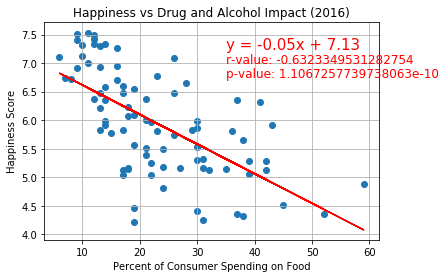

R-value: -0.6323349531282754, P-value: 1.1067257739738063e-10


In [13]:
#Linear Regression!
y_values=happy_food['2016 Happiness Score']
x_values=happy_food['Percent of Consumer Spending on Food']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Drug and Alcohol Impact (2016)')
plt.xlabel('Percent of Consumer Spending on Food')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(35,7.25),fontsize=15,color="red")
plt.annotate(r_value,(35,7),fontsize=12,color="red")
plt.annotate(p_value,(35,6.75),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/food.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [14]:
#Moderate negative correlation!
len(happy_food)

84

In [15]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_food, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country_x,2016 Happiness Score,Happiness score,Country_y,Percent of Consumer Spending on Food
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.404,7.278,Canada,9
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,7.104,6.892,United States,6
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.919,5.809,Kazakhstan,43
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,5.987,6.174,Uzbekistan,30
4,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,5.314,5.192,Indonesia,31


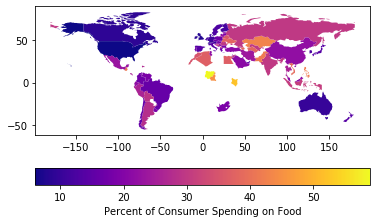

In [16]:
#Chorograph of Air Pollution
fig, ax = plt.subplots(1,1)
world.plot(column='Percent of Consumer Spending on Food', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "Percent of Consumer Spending on Food",'orientation': "horizontal"})
plt.savefig('Images/food_spending_map.png')